In [2]:
import numpy as np

In [4]:
from tensorflow.keras.models import Sequential 

In [5]:
from tensorflow.keras.layers import Dense, Dropout

In [6]:
 from tensorflow.keras.optimizers import RMSprop

In [7]:
 from tensorflow.keras.datasets import mnist

In [8]:
import matplotlib.pyplot as pl

In [9]:
from sklearn import metrics

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


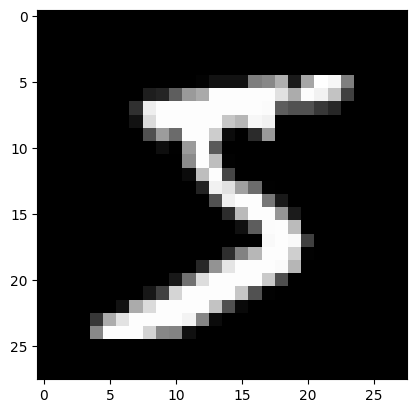

In [12]:
pl.imshow(x_train[0], cmap='gray')

In [13]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [14]:
print("X_train shape", x_train.shape)

X_train shape (60000, 28, 28)


In [15]:
print("y_train shape", y_train.shape) 

y_train shape (60000,)


In [16]:
print("X_test shape", x_test.shape)

X_test shape (10000, 28, 28)


In [17]:
print("y_test shape", y_test.shape)

y_test shape (10000,)


In [19]:
x_train = x_train.reshape(60000, 784) 

In [20]:
x_test = x_test.reshape(10000, 784)

In [21]:
x_train = x_train.astype('float32') 

In [22]:
x_test = x_test.astype('float32')

In [23]:
x_train /= 255

In [24]:
x_test /= 255

In [25]:
num_classes = 10

In [26]:
y_train = np.eye(num_classes)[y_train]

In [27]:
y_test = np.eye(num_classes)[y_test]

In [28]:
model = Sequential()

In [29]:
model.add(Dense(512, activation='relu', input_shape=(784,)))

In [30]:
model.add(Dropout(0.2))

In [31]:
model.add(Dense(512, activation='relu'))

In [32]:
model.add(Dropout(0.2))

In [33]:
model.add(Dense(num_classes, activation='softmax'))

In [34]:
model.compile(loss='categorical_crossentropy',
optimizer=RMSprop(),
metrics=['accuracy'])            

In [35]:
batch_size = 128

In [36]:
epochs = 20

In [37]:
history = model.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1,
validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 12s 23ms/step - loss: 0.2540 - accuracy: 0.9215 - val_loss: 0.1165 - val_accuracy: 0.9632
Epoch 2/20
469/469 [==============================] - 10s 22ms/step - loss: 0.1038 - accuracy: 0.9678 - val_loss: 0.0831 - val_accuracy: 0.9734
Epoch 3/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0741 - accuracy: 0.9772 - val_loss: 0.0785 - val_accuracy: 0.9764
Epoch 4/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0579 - accuracy: 0.9820 - val_loss: 0.0705 - val_accuracy: 0.9790
Epoch 5/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0478 - accuracy: 0.9853 - val_loss: 0.0698 - val_accuracy: 0.9811
Epoch 6/20
469/469 [==============================] - 11s 24ms/step - loss: 0.0406 - accuracy: 0.9872 - val_loss: 0.0665 - val_accuracy: 0.9821
Epoch 7/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0335 - accuracy: 0.9891 - val_loss: 0.0695 - val_accuracy: 

In [38]:
score = model.evaluate(x_test, y_test, verbose=0) 

In [39]:
print('Test loss:', score[0])

Test loss: 0.0799831822514534


In [41]:
print('Test accuracy:', score[1])

Test accuracy: 0.9848999977111816
